<a href="https://colab.research.google.com/github/pasdptt/PasdPublicNB/blob/master/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup environment

In [2]:
#Import Lib(s)

import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Getting Data source
!pip install -q kaggle

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [7]:
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 21.4MB/s]


In [8]:
!unzip /content/mushroom-classification.zip  && rm /content/mushroom-classification.zip

Archive:  /content/mushroom-classification.zip
  inflating: mushrooms.csv           


In [9]:
path = "/content/mushrooms.csv"
df = pd.read_csv(path)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [10]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
X = df.drop(['class'], axis = 1)
Y = df['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [12]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    start = time.process_time()
    trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    print(time.process_time() - start)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))

In [13]:
forest_test(X, Y)

2.4490113409999994
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Independant Component Analysis

Independent Component Analysis(ICA) algorithm is similar to PCA. There is a very subtle difference!

In PCA we try to find linear combinations of variables as Principal Components, and there is NO correlation between the principal components.

In ICA we try to find linear combinations of variable as Independent Components, and there is no dependency between any two Components

## What is the difference between correlation and independence?

Correlation signifies the mathematical relation between two vectors, like sales increase with an increase in discounts, hence there is a high positive correlation.

But the actual driver of sales would be the quality score of the product. Hence, we can say Sales are “dependent” on the quality score of the product.

Similarly, independence is also defined, like sales of shampoo is independent of the weather. But Sales of Ice Cream is dependent on weather.

Mathematically ICA works with below steps:

Establish an equation X=M*D where 

* X= matrix of Independent Components
* M=Mixing Matrix
* D=Original Data

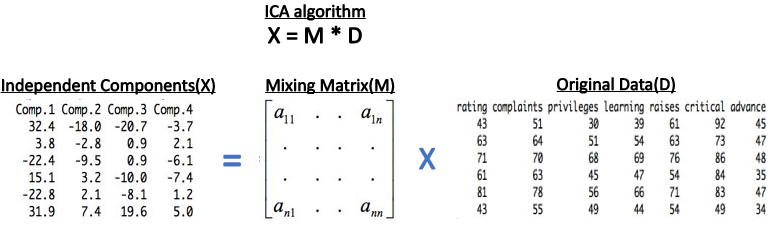

The goal of ICA is to find such a Matrix of mix “M” to be multiplied by the given data “D”, such that all columns in “X” are independent of each other.

## ICA Implementation and example

In [18]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

print('####### Final Independent Components ######')
ReducedData=pd.DataFrame(data=X_ica, columns=['IC1','IC2','IC3'])
print(ReducedData.head(10))

####### Final Independent Components ######
        IC1       IC2       IC3
0 -0.007650  0.010367  0.001831
1  0.000674  0.014059 -0.000613
2 -0.001529  0.016946 -0.002782
3 -0.005602  0.011485  0.002855
4 -0.008170  0.008561  0.004587
5  0.002262  0.013826 -0.000266
6  0.000216  0.015753 -0.002308
7 -0.000596  0.016683 -0.001602
8 -0.004403  0.008499  0.003276
9  0.002124  0.014442 -0.002121


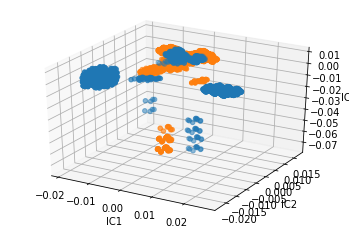

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

test = ReducedData

test['class'] = df['class']

classes = ["p", "e"]
colors = ['r', 'b']

for clas, color in zip(classes, colors):
    ax.scatter(test.loc[test['class'] == clas, 'IC1'],
               test.loc[test['class'] == clas, 'IC2'],
               test.loc[test['class'] == clas, 'IC3'],
               ) 
      
ax.set_xlabel('IC1')
ax.set_ylabel('IC2')
ax.set_zlabel('IC3')

plt.show()

In [19]:
forest_test(X_ica, Y)

3.543414242999999
[[1264   10]
 [  39 1125]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1274
           1       0.99      0.97      0.98      1164

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



# Linear Discriminant Analysis (LDA)

LDA is supervised learning dimensionality reduction technique and Machine Learning classifier.

LDA aims to maximize the distance between the mean of each class and minimize the spreading within the class itself. LDA uses therefore within classes and between classes as measures. This is a good choice because maximizing the distance between the means of each class when projecting the data in a lower-dimensional space can lead to better classification results (thanks to the reduced overlap between the different classes).

When using LDA, is assumed that the input data follows a Gaussian Distribution (like in this case), therefore applying LDA to not Gaussian data can possibly lead to poor classification results.

In this example, we will run LDA to reduce our dataset to just one feature, test its accuracy and plot the results.

In [15]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 117
Reduced number of features: 1


In [16]:
X_lda

array([[ 24.09738054],
       [-22.86450882],
       [-22.4475023 ],
       ...,
       [-21.2138889 ],
       [ 24.59619987],
       [-21.21052066]])

In [17]:
forest_test(X_lda, Y)

1.6167626789999998
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



As I mentioned at the beginning of this section, LDA can also be used as a classifier. Therefore, we can now test how an LDA Classifier can perform in this situation.

In [18]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y, 
                                                                        test_size = 0.30, 
                                                                        random_state = 101)

start = time.process_time()
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
print(time.process_time() - start)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

0.0036818820000004138
[[1274    0]
 [   2 1162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



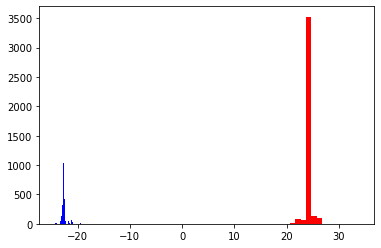

In [30]:
ReducedData2=pd.DataFrame(data=X_lda, columns=['LDA1'])

test2 = ReducedData2

test2['class'] = df['class']

classes = ["p", "e"]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.hist(test2.loc[test2['class'] == clas, 'LDA1'],color = color,bins=50)

plt.show()

# Locally Linear Embedding (LLE)

We have considered so far methods such as PCA and LDA, which are able to perform really well in case of linear relationships between the different features, we will now move on considering how to deal with non-linear cases.

Locally Linear Embedding is a dimensionality reduction technique based on Manifold Learning. A Manifold is an object of D dimensions which is embedded in an higher-dimensional space. Manifold Learning aims then to make this object representable in its original D dimensions instead of being represented in an unnecessary greater space.

A typical example used to explain Manifold Learning in Machine Learning is the Swiss Roll Manifold (Figure 6). We are given as input some data which has a distribution resembling the one of a roll (in a 3D space), and we can then unroll it so that to reduce our data into a two-dimensional space.
Some examples of Manifold Learning algorithms are: Isomap, Locally Linear Embedding, Modified Locally Linear Embedding, Hessian Eigenmapping, etc.

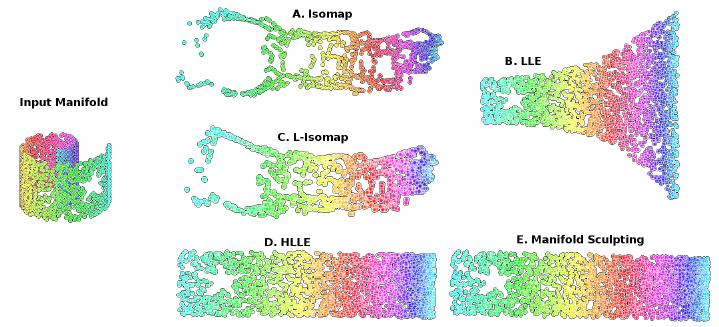

Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.


In [14]:
from sklearn.manifold import LocallyLinearEmbedding

#embedding = LocallyLinearEmbedding(n_components=3)
embedding = LocallyLinearEmbedding(n_components=3,eigen_solver ="dense")
X_lle = embedding.fit_transform(X)

forest_test(X_lle, Y)

2.7902767730000164
[[1274    0]
 [   3 1161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [15]:
X_lle

array([[ 4.75152982e-05,  2.34671186e-04, -1.93266074e-05],
       [-2.22854132e-02,  4.43857612e-03,  2.92459935e-03],
       [ 1.73659348e-02,  9.09348094e-03,  4.62834572e-04],
       ...,
       [-1.44908134e-03, -5.88195177e-03,  9.02432606e-04],
       [ 8.22355818e-03,  5.38231107e-03, -3.12573570e-04],
       [-1.31981454e-04,  2.08296623e-02,  2.26889994e-02]])

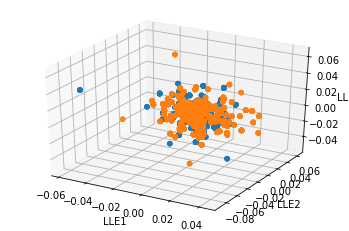

In [17]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

ReducedData3 = pd.DataFrame(data=X_lle, columns=['LLE1','LLE2','LLE3'])
test3 = ReducedData3

test3['class'] = df['class']

classes = ["p", "e"]
colors = ['r', 'b']

for clas, color in zip(classes, colors):
    ax2.scatter(test3.loc[test3['class'] == clas, 'LLE1'],
               test3.loc[test3['class'] == clas, 'LLE2'],
               test3.loc[test3['class'] == clas, 'LLE3'],
               ) 
      
ax2.set_xlabel('LLE1')
ax2.set_ylabel('LLE2')
ax2.set_zlabel('LLE3')

plt.show()

# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is non-linear dimensionality reduction technique which is typically used to visualize high dimensional datasets. Some of the main applications of t-SNE are Natural Language Processing (NLP), speech processing, etc…

t-SNE works by minimizing the divergence between a distribution constituted by the pairwise probability similarities of the input features in the original high dimensional space and its equivalent in the reduced low dimensional space. t-SNE makes then use of the Kullback-Leiber (KL) divergence in order to measure the dissimilarity of the two different distributions. The KL divergence is then minimized using gradient descent.

When using t-SNE, the higher dimensional space is modelled using a Gaussian Distribution, while the lower-dimensional space is modelled using a Student’s t-distribution. This is done, in order to avoid an imbalance in the neighbouring points distance distribution caused by the translation into a lower-dimensional space.

We are now ready to use TSNE and reduce our dataset to just 3 features.


In [18]:
from sklearn.manifold import TSNE

start = time.process_time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)
print(time.process_time() - start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8124 samples in 0.199s...
[t-SNE] Computed neighbors for 8124 samples in 14.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8124
[t-SNE] Computed conditional probabilities for sample 2000 / 8124
[t-SNE] Computed conditional probabilities for sample 3000 / 8124
[t-SNE] Computed conditional probabilities for sample 4000 / 8124
[t-SNE] Computed conditional probabilities for sample 5000 / 8124
[t-SNE] Computed conditional probabilities for sample 6000 / 8124
[t-SNE] Computed conditional probabilities for sample 7000 / 8124
[t-SNE] Computed conditional probabilities for sample 8000 / 8124
[t-SNE] Computed conditional probabilities for sample 8124 / 8124
[t-SNE] Mean sigma: 2.658530
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.643982
[t-SNE] KL divergence after 300 iterations: 1.911075
126.361304155


In [19]:
X_tsne

array([[-3.2292097 ,  2.8545117 , -5.1158195 ],
       [ 2.0387654 , -2.1807733 , -7.691919  ],
       [-1.1928258 , -0.48429936, -5.7362385 ],
       ...,
       [ 6.880587  ,  3.9534888 ,  3.2259684 ],
       [ 0.61876047, -4.631039  , -0.79067534],
       [ 3.9162316 ,  4.072618  ,  3.1524875 ]], dtype=float32)

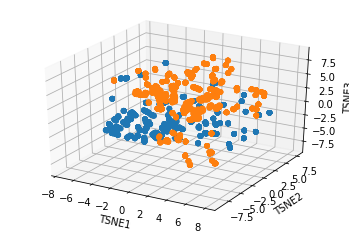

In [21]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

ReducedData3 = pd.DataFrame(data=X_tsne, columns=['TSNE1','TSNE2','TSNE3'])
test4 = ReducedData3

test4['class'] = df['class']

classes = ["p", "e"]
colors = ['r', 'b']

for clas, color in zip(classes, colors):
    ax3.scatter(test4.loc[test4['class'] == clas, 'TSNE1'],
               test4.loc[test4['class'] == clas, 'TSNE2'],
               test4.loc[test4['class'] == clas, 'TSNE3'],
               ) 
      
ax3.set_xlabel('TSNE1')
ax3.set_ylabel('TSNE2')
ax3.set_zlabel('TSNE3')

plt.show()

In [23]:
forest_test(X_tsne, Y)

3.076191937000033
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Autoencoders

Autoencoders are a family of Machine Learning algorithms which can be used as a dimensionality reduction technique. The main difference between Autoencoders and other dimensionality reduction techniques is that Autoencoders use non-linear transformations to project data from a high dimension to a lower one.

There exist different types of Autoencoders such as:
* Denoising Autoencoder
* Variational Autoencoder
* Convolutional Autoencoder
* Sparse Autoencoder

In this example, we will start by building a basic Autoencoder (Figure below). The basic architecture of an Autoencoder can be broken down into 2 main components:

1. Encoder: takes the input data and compress it, so that to remove all the possible noise and unhelpful information. The output of the Encoder stage is usually called bottleneck or latent-space.
2. Decoder: takes as input the encoded latent space and tries to reproduce the original Autoencoder input using just it’s compressed form (the encoded latent space).

If all the input features are independent of each other, then the Autoencoder will find particularly difficult to encode and decode to input data into a lower-dimensional space.

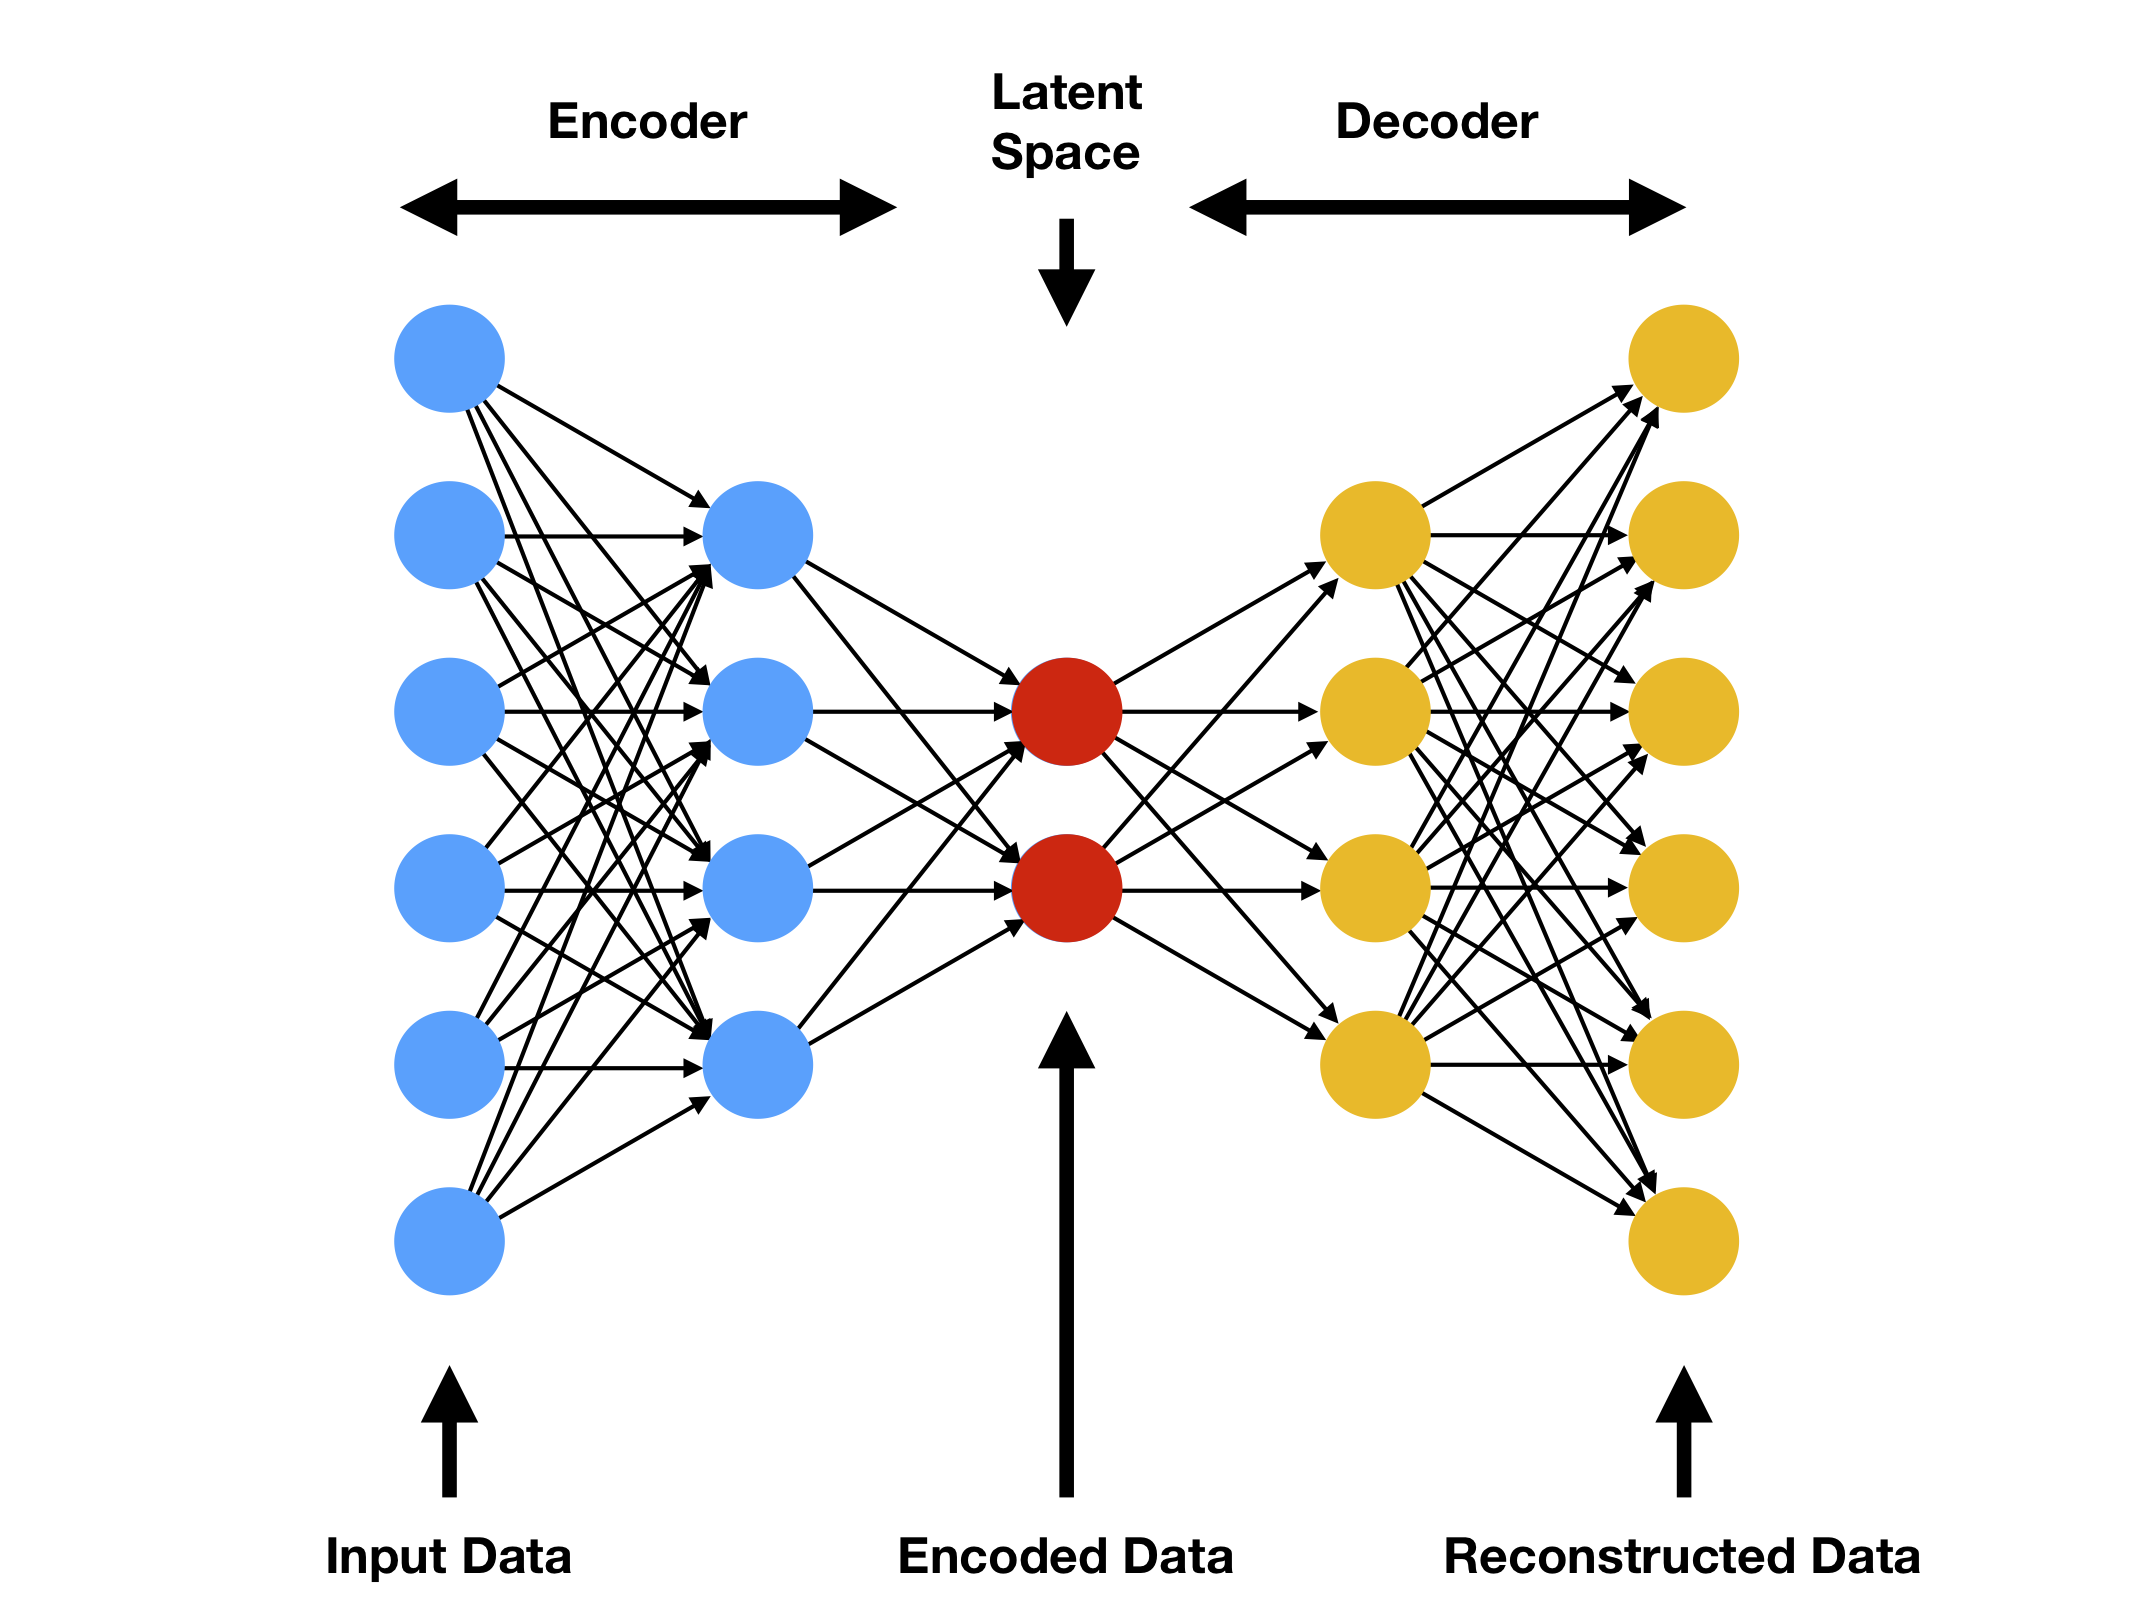

Autoencoders can be implemented in Python using Keras API. In this case, we specify in the encoding layer the number of features we want to get our input data reduced to (for this example 3). As we can see from the code snippet below, Autoencoders take X (our input features) as both our features and labels (X, Y).

For this example, I decided to use ReLu as the activation function for the encoding stage and Softmax for the decoding stage. If I wouldn’t have used non-linear activation functions, then the Autoencoder would have tried to reduce the input data using a linear transformation (therefore giving us a result similar to if we would have used PCA).


In [24]:
from keras.layers import Input, Dense
from keras.models import Model

input_layer = Input(shape=(X.shape[1],))
encoded = Dense(3, activation='relu')(input_layer)
decoded = Dense(X.shape[1], activation='softmax')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

X1, X2, Y1, Y2 = train_test_split(X, X, test_size=0.3, random_state=101)

autoencoder.fit(X1, Y1,
                epochs=100,
                batch_size=300,
                shuffle=True,
                verbose = 30,
                validation_data=(X2, Y2))

encoder = Model(input_layer, encoded)
X_ae = encoder.predict(X)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

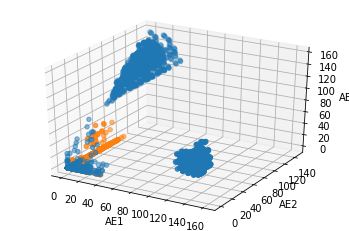

In [26]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')

ReducedData4 = pd.DataFrame(data=X_ae, columns=['AE1','AE2','AE3'])
test5 = ReducedData4

test5['class'] = df['class']

classes = ["p", "e"]
colors = ['r', 'b']

for clas, color in zip(classes, colors):
    ax4.scatter(test5.loc[test5['class'] == clas, 'AE1'],
               test5.loc[test5['class'] == clas, 'AE2'],
               test5.loc[test5['class'] == clas, 'AE3'],
               ) 
      
ax4.set_xlabel('AE1')
ax4.set_ylabel('AE2')
ax4.set_zlabel('AE3')

plt.show()

In [25]:
forest_test(X_ae, Y)

2.119258287999969
[[1234   40]
 [ 223  941]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1274
           1       0.96      0.81      0.88      1164

    accuracy                           0.89      2438
   macro avg       0.90      0.89      0.89      2438
weighted avg       0.90      0.89      0.89      2438

